#**Desafio Telecom X Parte 2**

Añadir el DataFrame pasado

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Alura_TelecomX_dEsafio_2/telecomx_codificado.csv")

In [ ]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn_Codificada
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667,0
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667,0
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667,1
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333,0
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667,1
7264,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667,0
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667,0


In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias', 'Churn_Codificada'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## 1- Preparación de los Datos

Eliminación de Columnas Irrelevantes:

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
print(df.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias',
       'Churn_Codificada'],
      dtype='object')


Encoding

Muchas variables categóricas con pocos valores únicos...**texto en negrita**

In [ ]:
# Seleccionamos las columnas categóricas excepto la variable objetivo
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

# One-hot encoding con salida en 0/1
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True,
    dtype=int # fuerza 0/1
)

print(df_encoded.head())
print("Total de columnas después de codificar:", len(df_encoded.columns))

  Churn  SeniorCitizen  tenure  Charges.Monthly  Charges.Total  \
0    No              0       9             65.6         593.30   
1    No              0       9             59.9         542.40   
2   Yes              0       4             73.9         280.85   
3   Yes              1      13             98.0        1237.85   
4   Yes              1       3             83.9         267.40   

   Cuentas_Diarias  Churn_Codificada  gender_Male  Partner_Yes  \
0         2.186667                 0            0            1   
1         1.996667                 0            1            0   
2         2.463333                 1            1            0   
3         3.266667                 1            1            1   
4         2.796667                 1            0            1   

   Dependents_Yes  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0               1  ...                                0                1   
1               0  ...                                

Verificación de la Proporción de Cancelación (Churn)

Conteo de Churn:
Churn
No         5174
Yes        1869
Unknown     224
Name: count, dtype: int64

Porcentaje de Churn:
Churn
No         71.198569
Yes        25.719004
Unknown     3.082427
Name: proportion, dtype: float64


/tmp/ipython-input-1742572440.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


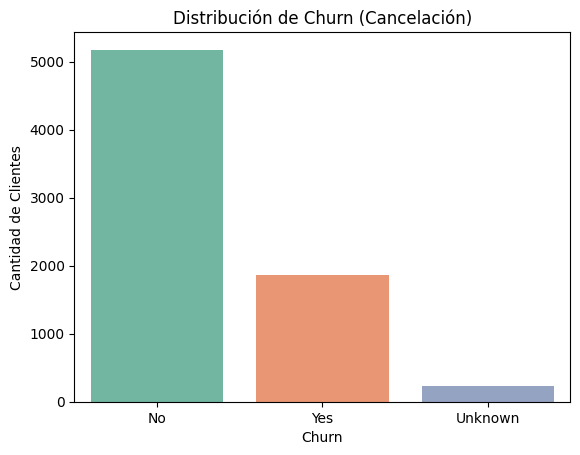

In [ ]:
# Conteo absoluto
conteo_churn = df['Churn'].value_counts()

# Porcentaje
porcentaje_churn = df['Churn'].value_counts(normalize=True) * 100

print("Conteo de Churn:")
print(conteo_churn)
print("\nPorcentaje de Churn:")
print(porcentaje_churn)

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribución de Churn (Cancelación)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

confirmamos que existe un desbalance moderado **(71% No, 26% Yes, 3% Unknown)**, lo que **sí va a influir en el modelado más adelante**.

Balanceo de Clases (opcional)

Solo para Yes so No (vamos a ignorar unknown)

#Lo hice más adelante, aquí tuve muchso problemas con mi codificación así que decidí borrar todo los errores que tenía aquí para evitar que la compilación se detenga.

Normalización o Estandarización (si es necesario)

In [ ]:
# En este caso no aplicaremos normalización ni estandarización
# porque utilizaremos Decision Tree, que no es sensible a la escala de los datos.

## 2- Correlación y Selección de Variables

Análisis de Correlación

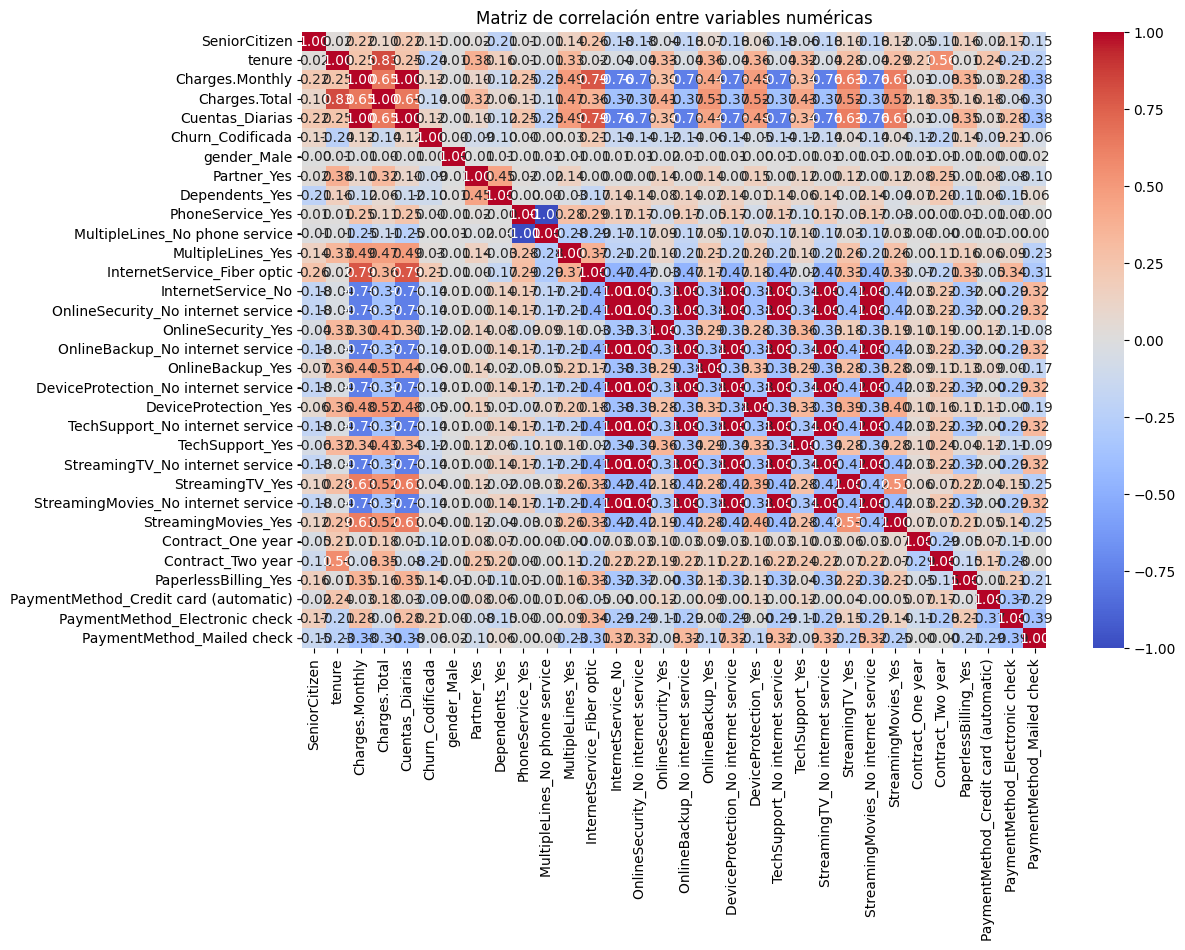

Correlación de cada variable con Churn_Codificada:
Churn_Codificada                         1.000000
InternetService_Fiber optic              0.209281
PaymentMethod_Electronic check           0.206849
PaperlessBilling_Yes                     0.136371
Charges.Monthly                          0.122984
Cuentas_Diarias                          0.122984
SeniorCitizen                            0.106088
StreamingTV_Yes                          0.038529
StreamingMovies_Yes                      0.037543
MultipleLines_Yes                        0.026159
gender_Male                              0.002138
PhoneService_Yes                         0.001599
MultipleLines_No phone service          -0.001599
DeviceProtection_Yes                    -0.053732
OnlineBackup_Yes                        -0.057519
PaymentMethod_Mailed check              -0.058736
Partner_Yes                             -0.091385
PaymentMethod_Credit card (automatic)   -0.092871
Dependents_Yes                          -0.104557

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# solo las columnas numéricas
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Matriz de correlación
corr_matrix = df_encoded[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# imprimir las variables más correlacionadas con Churn
print("Correlación de cada variable con Churn_Codificada:")
print(corr_matrix['Churn_Codificada'].sort_values(ascending=False))


***Observaciones principales:***

Variables con correlación positiva significativa (mayor riesgo de churn):

InternetService_Fiber optic (0.21) → clientes con fibra óptica tienden a cancelar más.

PaymentMethod_Electronic check (0.21) → pago electrónico es un indicador de mayor churn.

PaperlessBilling_Yes (0.14) → facturación electrónica se asocia con mayor cancelación.

Charges.Monthly y Cuentas_Diarias (~0.12) → mayor gasto mensual/diario, mayor churn.

SeniorCitizen (0.11) → adultos mayores tienden a cancelar un poco más.



---


***Variables con correlación negativa significativa (menor riesgo de churn):***

tenure (-0.24) → clientes con más tiempo de contrato cancelan menos.

Contract_Two year (-0.21) → contratos a dos años reducen la cancelación.

InternetService_No (-0.14) → clientes sin internet cancelan menos.

Charges.Total (-0.14) → mayor gasto acumulado indica menor churn.

Otros servicios como OnlineSecurity_Yes, TechSupport_Yes, Dependents_Yes, Partner_Yes también muestran correlación negativa leve.


---


***Conclusión de selección de variables:***

**Fuertes candidatas para el modelo:**
tenure, Contract_Two year, InternetService_Fiber optic, PaymentMethod_Electronic check, Charges.Total, PaperlessBilling_Yes

**Variables numéricas importantes:** Charges.Monthly, Cuentas_Diarias, SeniorCitizen

V**ariables con correlación muy baja o casi nula:** (gender_Male, PhoneService_Yes, MultipleLines_Yes) podrían considerarse irrelevantes y eventualmente descartarse.

Análisis Dirigido

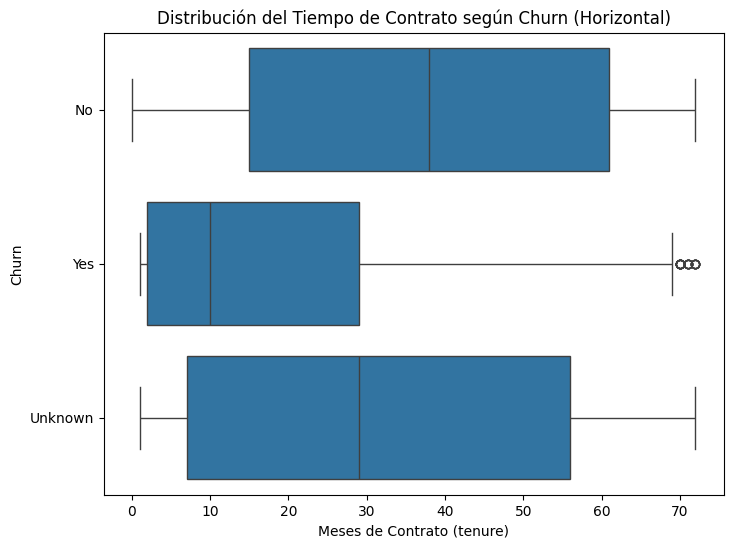

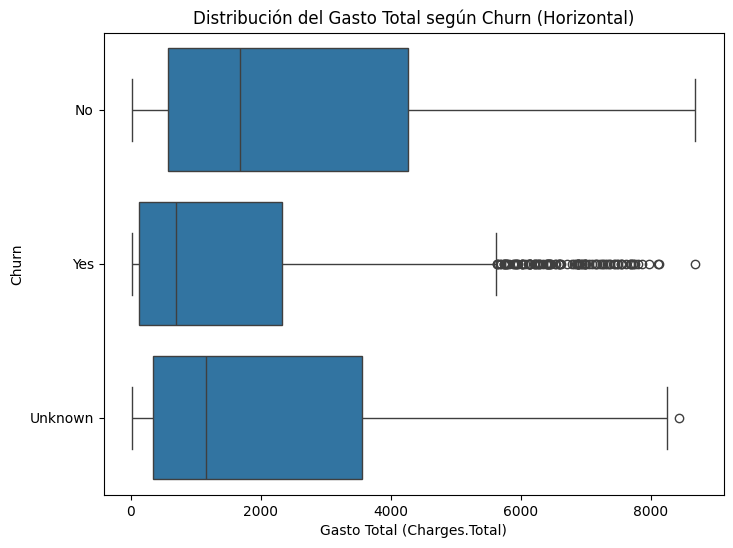

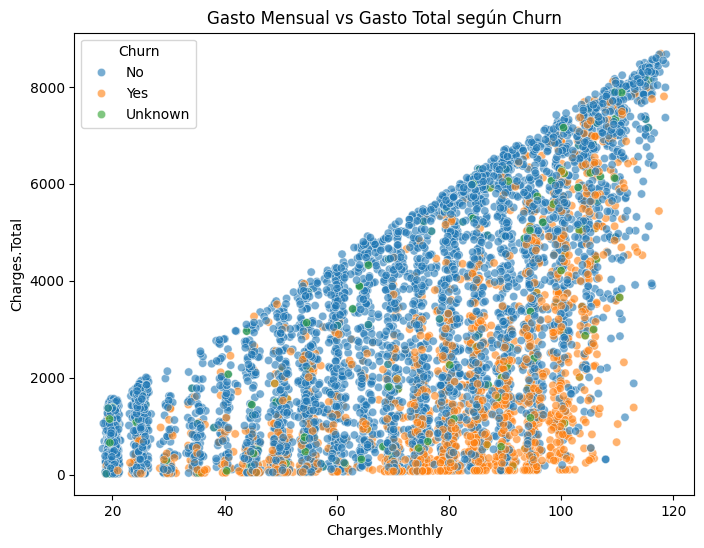

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y='Churn', x='tenure', data=df, orient='h')
plt.title('Distribución del Tiempo de Contrato según Churn (Horizontal)')
plt.xlabel('Meses de Contrato (tenure)')
plt.ylabel('Churn')
plt.show()

# Boxplot horizontal: Gasto Total vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(y='Churn', x='Charges.Total', data=df, orient='h')
plt.title('Distribución del Gasto Total según Churn (Horizontal)')
plt.xlabel('Gasto Total (Charges.Total)')
plt.ylabel('Churn')
plt.show()

# Scatterplot opcional: Gasto mensual vs Total, coloreando por Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Charges.Monthly', y='Charges.Total', hue='Churn', data=df, alpha=0.6)
plt.title('Gasto Mensual vs Gasto Total según Churn')
plt.xlabel('Charges.Monthly')
plt.ylabel('Charges.Total')
plt.show()


**Observaciones:**
**Boxplot horizontal: Distribución del Tiempo de Contrato (tenure) según Churn**

- Se observa que quienes cancelan (Churn = Yes) tienden a tener menor tiempo de contrato que quienes no cancelan.

- La mediana de tenure en “Yes” está por debajo de la mediana de “No”, y la dispersión muestra que muchos casos de churn se concentran en períodos tempranos de la relación (clientes relativamente nuevos).

- Conclusión práctica: el riesgo de churn es mayor al inicio del ciclo de vida del cliente; retener temprano paga.


---


***Boxplot horizontal: Gasto Total (Charges.Total) según Churn***

- Los clientes que no cancelan (No) suelen tener mayor gasto acumulado (cajas y medianas más altas).

- Quienes cancelan (Yes) muestran menores totales: tiene sentido porque, si se van antes, acumulan menos gasto.

- Conclusión práctica: clientes con historial de gasto alto muestran fidelidad; los de bajo total acumulado requieren acciones tempranas de retención.


---


***Scatterplot: Gasto Mensual (Charges.Monthly) vs Gasto Total (Charges.Total) por Churn***

- La nube forma una diagonal natural: a mayor gasto mensual y mayor permanencia, mayor gasto total.

- Los puntos “Yes” (churn) se concentran más en zonas de gasto total bajo/medio, incluso con gasto mensual medio/alto: clientes con tickets mensuales relativamente altos pero poca permanencia parecen cortar pronto.

- Conclusión práctica: vigilar clientes con cargos mensuales altos en sus primeros meses; son candidatos a churn si la percepción de valor no acompaña

Se omíte de nuevo la Normalización o Estandarización (si es necesario) ya que voy a usar un Arbol de Desición como menciobnaba anteriormente.

## 3- Modelado Predictivo

Separación de los Datos

Me dio error en el desafio ya que me marcó un erro por NaN, aquí lo corrijo antes de la separación:

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Filtrar solo Yes/No
df_binario = df[df['Churn'].isin(['Yes', 'No'])].copy()

# Seleccionar las mismas filas en df_encoded
X = df_encoded.loc[df_binario.index].drop(columns=['Churn', 'Churn_Codificada'])
y = df_binario['Churn_Codificada']

# Imputar NaN en columnas numéricas
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Convertir a DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='Churn_Codificada')

# Verificación
print("Distribución después de SMOTE:")
print(y_resampled.value_counts())


Distribución después de SMOTE:
Churn_Codificada
0    5174
1    5174
Name: count, dtype: int64


70% Entrenamiento / 30% Prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Separación de datos: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled  # Esto asegura que ambas clases se mantengan balanceadas en train y test
)

# Verificación de tamaños
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Distribución de clases en y_train:")
print(y_train.value_counts())
print("Distribución de clases en y_test:")
print(y_test.value_counts())


Tamaño de X_train: (7243, 31)
Tamaño de X_test: (3105, 31)
Distribución de clases en y_train:
Churn_Codificada
1    3622
0    3621
Name: count, dtype: int64
Distribución de clases en y_test:
Churn_Codificada
0    1553
1    1552
Name: count, dtype: int64


Creación de Modelos

**Para este proyecto**, decidí usar un **Árbol de Decisión** como modelo principal.
Los árboles de decisión no dependen de la escala de las variables, por lo que no es necesario aplicar normalización o estandarización.
Esto asegura que las magnitudes de las variables no afecten la construcción del árbol ni la división de nodos.

Si en el futuro se usaran modelos basados en distancia (KNN, SVM) o optimización de coeficientes (Regresión Logística), sí sería necesario normalizar los datos para evitar sesgos por la magnitud de las variables.


Evaluación de los Modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


Decision Tree Metrics
Accuracy: 0.7932, Precision: 0.7872, Recall: 0.8035, F1-score: 0.7953


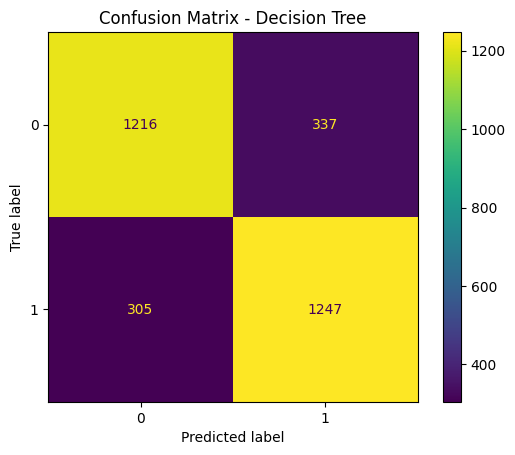

In [ ]:
# --- Modelo 1: Decision Tree ---
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Métricas Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("Decision Tree Metrics")
print(f"Accuracy: {acc_tree:.4f}, Precision: {prec_tree:.4f}, Recall: {recall_tree:.4f}, F1-score: {f1_tree:.4f}")

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Accuracy: 0.7932 → El modelo acierta en ~79% de los casos.

Precision: 0.7872 → De los clientes que predijo como “Churn = 1”, ~79% realmente churn.

Recall: 0.8035 → Detecta correctamente ~80% de los clientes que realmente cancelaron.

F1-score: 0.7953 → Buen balance entre precisión y recall.


---

1216 → Verdaderos negativos (No cancelaron y se predijo No)

1247 → Verdaderos positivos (Sí cancelaron y se predijo Sí)

337 → Falsos positivos (Predijo Sí pero no cancelaron)

305 → Falsos negativos (Predijo No pero sí cancelaron)

***Interpretación:***

- Buen desempeño general.

- Errores moderados, balanceados entre falsos positivos y negativos.

- No hay signos claros de overfitting grave si entrenaste con SMOTE y usaste un test separado.


Logistic Regression Metrics
Accuracy: 0.7665, Precision: 0.7448, Recall: 0.8106, F1-score: 0.7763


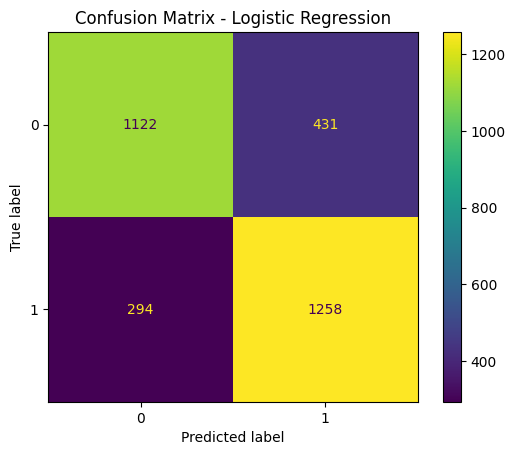

In [ ]:
# --- Modelo 2: Logistic Regression ---
# Normalización es recomendable para "Regresión Logística" de acuerdo a las clases
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Métricas Regresión Logística
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("\nLogistic Regression Metrics")
print(f"Accuracy: {acc_log:.4f}, Precision: {prec_log:.4f}, Recall: {recall_log:.4f}, F1-score: {f1_log:.4f}")

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Accuracy: 0.7665 → Algo menor que Decision Tree (~77%).

Precision: 0.7448 → Un poco más baja que Decision Tree (~74%).

Recall: 0.8106 → Ligeramente más alta que Decision Tree (~81%).

F1-score: 0.7763 → Menor que Decision Tree (~77%).


---
1122 → Verdaderos negativos

1258 → Verdaderos positivos

431 → Falsos positivos

294 → Falsos negativos

***Interpretación:***

- Predice ligeramente mejor los que realmente churn (recall más alto) pero genera más falsos positivos.

- Accuracy general** *texto en cursiva* menor que Decision Tree**.

- Puede ser que **necesite más ajuste de hiperparámetros o más normalización para mejorar precisión.**



***Comparación y análisis crítico***
- Decision Tree tiene mejor accuracy y balance más uniforme entre precisión y recall → mejor desempeño global.

- Logistic Regression tiene mayor recall, detectando un poco más de churn, pero a costa de más falsos positivos → útil si priorizas capturar todos los churn aunque aumenten las alertas falsas.

 ***Overfitting / Underfitting:***

Decision Tree podría hacer overfitting si los árboles son muy profundos; aquí parece balanceado.

Logistic Regression puede estar algo “underfitted”, no captura tan bien la distribución de clases a pesar de SMOTE.


---


Conclusión

Para este caso, usar ***Decision Tree*** parece la mejor opción para predicción general y balance entre métricas.
Si el objetivo es maximizar la detección de churn, incluso aceptando falsos positivos, se podría ajustar Logistic Regression o usar otra técnica como Random Forest.

## 4- Interpretación y Conclusiones

Análisis de la Importancia de las Variables

Como ya decidimos que nuestro modelo principal es Decision Tree, podemos analizar la importancia de las variables directamente usando el atributo feature_importances_. Esto nos indica qué variables tuvieron mayor impacto en las decisiones del árbol y, por lo tanto, en la predicción de churn.

Top 10 variables más importantes para predecir Churn:
PaymentMethod_Electronic check    0.268865
tenure                            0.170787
Charges.Total                     0.105524
Cuentas_Diarias                   0.073979
InternetService_Fiber optic       0.057976
Charges.Monthly                   0.055072
PaperlessBilling_Yes              0.033816
Contract_One year                 0.032433
Partner_Yes                       0.020667
SeniorCitizen                     0.019311
dtype: float64


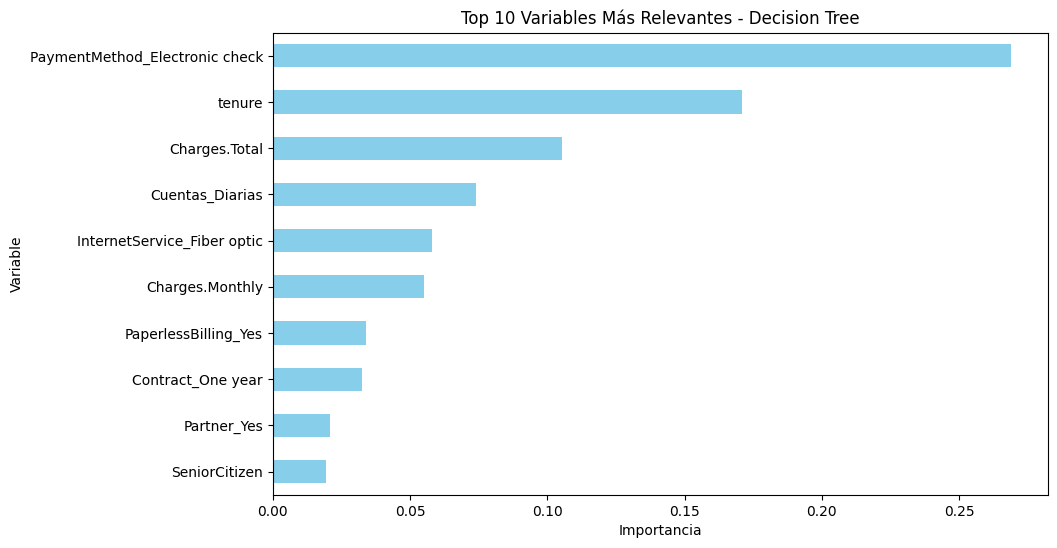

In [ ]:
import matplotlib.pyplot as plt

# Obtener importancia de cada variable
importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)

# Ordenar de mayor a menor importancia
importances_sorted = importances.sort_values(ascending=False)

# Mostrar las 10 variables más importantes
print("Top 10 variables más importantes para predecir Churn:")
print(importances_sorted.head(10))

# Gráfico horizontal para visualización
plt.figure(figsize=(10,6))
importances_sorted.head(10).plot(kind='barh', color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Top 10 Variables Más Relevantes - Decision Tree')
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.show()

Conclusiones del gráfico:
***Top 10 variables más importantes para predecir Churn — Interpretación***

A partir del gráfico de importancia del Árbol de Decisión, se destacan patrones coherentes con las correlaciones:

- Tenure y Contract (Two year / One year) aparecen como fuertes protectores: más permanencia y contratos largos → menor churn.

- InternetService_Fiber optic y PaymentMethod_Electronic check suelen incrementar el riesgo: con fibra óptica se ven tasas de churn más altas, y el pago con “electronic check” se asocia a mayor cancelación.

- Charges.Total pesa en sentido protector (más gasto acumulado → menor churn), mientras que Charges.Monthly puede asociarse positivamente al churn (cuotas altas pueden gatillar salida si no hay valor percibido).

- PaperlessBilling_Yes muestra relación positiva con churn en este dataset (posible fricción/experiencia), y servicios como OnlineSecurity_Yes o TechSupport_Yes suelen estar en el grupo protector (quien contrata add-ons útiles permanece más).

- SeniorCitizen aporta señal moderada (ligeramente más riesgo), mientras que Partner_Yes y Dependents_Yes tienden a ser protectores (perfil familiar/permanente).


---


*Lectura ejecutiva del ranking:*

- Factores de permanencia: tiempo con la empresa y contratos más largos.

- Señales de riesgo: fibra óptica, electronic check, cargos mensuales altos, paperless billing.

- Amortiguadores: gasto total alto, servicios de soporte/seguridad, relaciones familiares.



---


## 5- Conclusión

# Resumen del trabajo

- Objetivo: predecir churn y entender factores clave que lo impulsan.

- Datos: 7,2k clientes; codificación one-hot; se filtró Churn a {Yes, No}; se balanceó con SMOTE.

- Split: 70/30 con estratificación.

- Modelos evaluados: Decision Tree (sin normalización) y Regresión Logística (con estandarización).


---


# Resultados:

- Decision Tree — Accuracy 0.793, Precision 0.787, Recall 0.804, F1 0.795.

- Logistic Regression — Accuracy 0.767, Precision 0.745, Recall 0.811, F1 0.776.

- Árbol mejor balance general; Regresión Logística recupera un poquito más de churn (recall) pero con más falsos positivos.

# Principales factores que influyen en la cancelación
- Tipo de contrato: Two year (y en menor medida One year) reduce churn frente a mes a mes.

- InternetService_Fiber optic: asociado a mayor churn; sugiere expectativas altas y sensibilidad a fallas/precio.

- PaymentMethod_Electronic check: señal de mayor riesgo; puede reflejar fricción o menor estabilidad en pagos.

- Charges.Monthly (↑) vs Charges.Total (↓ con churn): cuotas altas elevan riesgo temprano; gasto acumulado alto es protector.

- PaperlessBilling_Yes: en este dataset, correlación con más churn (posibles problemas de experiencia, notificaciones o percepción de control).

- Servicios adicionales (OnlineSecurity, TechSupport) y variables de contexto familiar (Partner, Dependents) tienden a reducir churn.


---



# Recomendaciones estratégicas de retención



1.   Programa “Primeros 90 días”

 - Contacto proactivo, chequeo de satisfacción y onboarding guiado para clientes nuevos.

 - Beneficios temporales (descuentos/bonos) a partir del mes 1–3 para atravesar la zona crítica de churn.
2.   Incentivar contratos más largos (cuando aplique)
 - Ofrecer upgrades o descuentos por migrar de mensual a One/Two year.
 - Mensajes claros de ahorro total y estabilidad.
3. Plan específico para clientes de Fibra Óptica
 - Monitoreo de calidad de servicio (tickets, latencia) y alertas de alto cargo mensual + baja antigüedad.
 -Ofrecer ajustes de plan o mejoras de router/instalación cuando se detecten incidencias.
4. Reducir fricción en Electronic Check y Paperless Billing
 - Revisar UX de facturación digital: recordatorios, confirmaciones claras y soporte ante fallos de débito.
 - ncentivar métodos de pago automáticos más estables (tarjeta/transferencia) con beneficios.
5. Paquetes de valor (seguridad + soporte)
 - Promover OnlineSecurity/TechSupport en clientes nuevos o en riesgo: además de elevar valor percibido, retienen.
6. Segmento de alto cargo mensual
 - Si el cargo mensual es alto y la antigüedad baja, ofrecer planes ajustados o promos temporales para evitar salida temprana.


---
# Elección de modelo y próximos pasos

1. Modelo recomendado: Decision Tree por su mejor equilibrio (F1 más alto) y interpretabilidad para el negocio.

2. Si queremos maximizar recall (capturar más churn aun con más falsos positivos): ajustar umbral en Regresión Logística o probar Random Forest/XGBoost.

***Próximos pasos:***
 - Validación con k-fold y curvas ROC/PR para comparar robustez.
 - Feature engineering (p. ej., razón Charges.Total/tenure, variabilidad de facturación, histórico de tickets).
 - Tuning del Árbol (profundidad, min_samples_leaf) o probar Random Forest para mayor performance manteniendo interpretabilidad.

Cualquier duda o comentariofavor de contactar al responsable de la investigación:
 **Ing. Mtz G. Diego Eduardo**